In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

data = pd.read_csv("국민건강보험공단_건강검진정보_20211231.csv")

data

,HCHK_YEAR,IDV_ID,SIDO,SEX,AGE_GROUP,HEIGHT,WEIGHT,WAIST,SIGHT_LEFT,SIGHT_RIGHT,...,GAMMA_GTP,SMK_STAT_TYPE_CD,DRK_YN,HCHK_OE_INSPEC_YN,CRS_YN,TTH_MSS_YN,ODT_TRB_YN,WSDM_DIS_YN,TTR_YN,DATA_STD_DT
0,2021,2551207,41,2,12,160,60,79.0,0.0,0.0,...,23.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
1,2021,4030716,41,2,11,160,60,74.0,0.0,0.0,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
2,2021,3297511,41,2,9,150,60,72.0,0.0,0.0,...,70.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
3,2021,1638533,41,2,16,150,60,86.0,0.0,0.0,...,24.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
4,2021,456602,41,2,13,155,60,66.0,0.0,0.0,...,12.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,2021,4447892,11,2,14,150,60,91.0,0.0,0.0,...,32.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0,2022-08-11
999996,2021,2763417,47,1,9,170,100,99.0,1.0,1.0,...,73.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
999997,2021,572436,47,2,10,150,75,98.0,0.0,0.0,...,70.0,1.0,0.0,0,NaN,NaN,NaN,NaN,NaN,2022-08-11
999998,2021,541281,11,2,10,160,55,70.0,0.0,0.0,...,140.0,1.0,0.0,1,0.0,NaN,NaN,NaN,0.0,2022-08-11


In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   HCHK_YEAR          1000000 non-null  int64  
 1   IDV_ID             1000000 non-null  int64  
 2   SIDO               1000000 non-null  int64  
 3   SEX                1000000 non-null  int64  
 4   AGE_GROUP          1000000 non-null  int64  
 5   HEIGHT             1000000 non-null  int64  
 6   WEIGHT             1000000 non-null  int64  
 7   WAIST              999917 non-null   float64
 8   SIGHT_LEFT         999789 non-null   float64
 9   SIGHT_RIGHT        999790 non-null   float64
 10  HEAR_LEFT          999810 non-null   float64
 11  HEAR_RIGHT         999811 non-null   float64
 12  BP_HIGH            992655 non-null   float64
 13  BP_LWST            992655 non-null   float64
 14  BLDS               992588 non-null   float64
 15  TOT_CHOLE          425059 non-nul

In [174]:
missing_values = data.isnull().sum()

print("각 컬럼별 결측치 개수:")
print(missing_values)

각 컬럼별 결측치 개수:
HCHK_YEAR                  0
IDV_ID                     0
SIDO                       0
SEX                        0
AGE_GROUP                  0
HEIGHT                     0
WEIGHT                     0
WAIST                     83
SIGHT_LEFT               211
SIGHT_RIGHT              210
HEAR_LEFT                190
HEAR_RIGHT               189
BP_HIGH                 7345
BP_LWST                 7345
BLDS                    7412
TOT_CHOLE             574941
TRIGLYCERIDE          574945
HDL_CHOLE             574945
LDL_CHOLE             582568
HMG                     7414
OLIG_PROTE_CD          12561
CREATININE              7407
SGOT_AST                7405
SGPT_ALT                7405
GAMMA_GTP               7406
SMK_STAT_TYPE_CD         370
DRK_YN                   168
HCHK_OE_INSPEC_YN          0
CRS_YN                683234
TTH_MSS_YN           1000000
ODT_TRB_YN           1000000
WSDM_DIS_YN          1000000
TTR_YN                683233
DATA_STD_DT                0


# 고혈압 : 수축기,이완기 혈압

<Axes: xlabel='SMK_STAT_TYPE_CD', ylabel='BP_HIGH'>

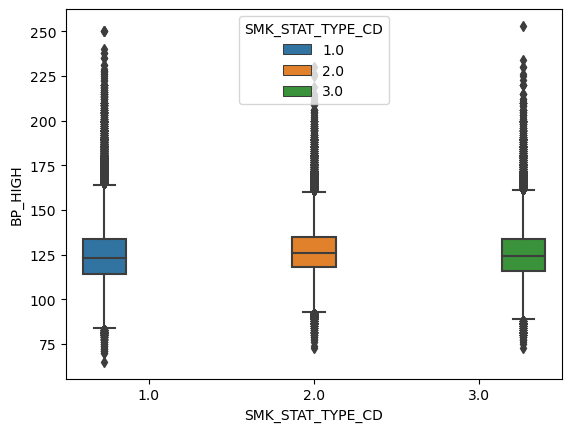

In [175]:
tension = ["BP_HIGH","BP_LWST","SMK_STAT_TYPE_CD"]
tensino_df = data[tension]
tensino_df

sns.boxplot(tensino_df,x="SMK_STAT_TYPE_CD",y="BP_HIGH",hue="SMK_STAT_TYPE_CD")

/Users/ohmyeongbin/anaconda3/envs/sda2023/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


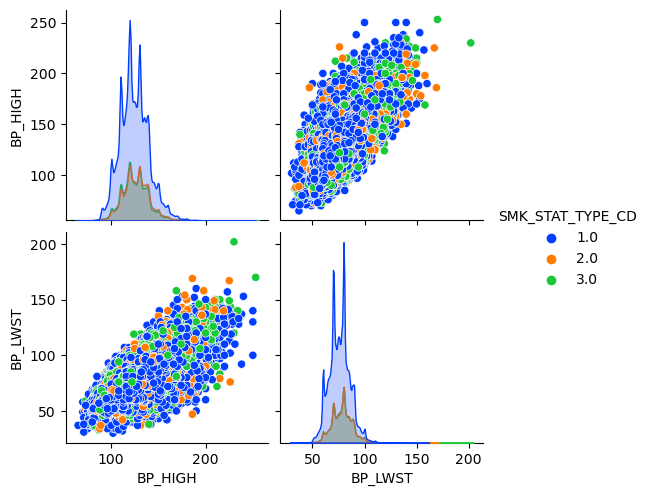

In [110]:
import seaborn as sns
sns.pairplot(tensino_df,
            diag_kind = 'kde',
            hue = 'SMK_STAT_TYPE_CD',
            palette= 'bright')

plt.show()

In [176]:
# 'SMK_STAT_TYPE_CD' 열의 값이 3인 경우를 2로 변경
t_df = tensino_df.copy()
# DataFrame에서 수축기혈압과 이완기혈압의 결측치를 제거
t_df = t_df.dropna(subset=["BP_HIGH","BP_LWST","SMK_STAT_TYPE_CD"])
# 결과 출력
print(t_df.head())

missing_values = t_df.isnull().sum()

print("각 컬럼별 결측치 개수:")
print(missing_values)




   BP_HIGH  BP_LWST  SMK_STAT_TYPE_CD
0    101.0     60.0               1.0
1    121.0     75.0               1.0
2    135.0     82.0               1.0
3    130.0     77.0               1.0
4    120.0     80.0               1.0
각 컬럼별 결측치 개수:
BP_HIGH             0
BP_LWST             0
SMK_STAT_TYPE_CD    0
dtype: int64


In [178]:
t_df['SMK_STAT_TYPE_CD'] = t_df['SMK_STAT_TYPE_CD'].replace(3.0, 2.0)

print(t_df.head())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 3.0])

   BP_HIGH  BP_LWST  SMK_STAT_TYPE_CD
0    101.0     60.0               1.0
1    121.0     75.0               1.0
2    135.0     82.0               1.0
3    130.0     77.0               1.0
4    120.0     80.0               1.0
Empty DataFrame
Columns: [BP_HIGH, BP_LWST, SMK_STAT_TYPE_CD]
Index: []


In [154]:
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_HIGH'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_HIGH'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_LWST'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_LWST'].count())


363539
628747
363539
628747


/Users/ohmyeongbin/anaconda3/envs/sda2023/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


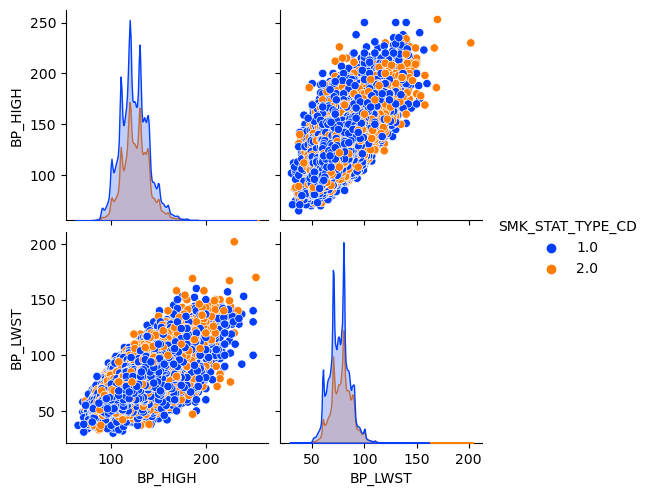

In [114]:
import seaborn as sns
sns.pairplot(t_df,
            diag_kind = 'kde',
            hue = 'SMK_STAT_TYPE_CD',
            palette= 'bright')

plt.show()

/Users/ohmyeongbin/anaconda3/envs/sda2023/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


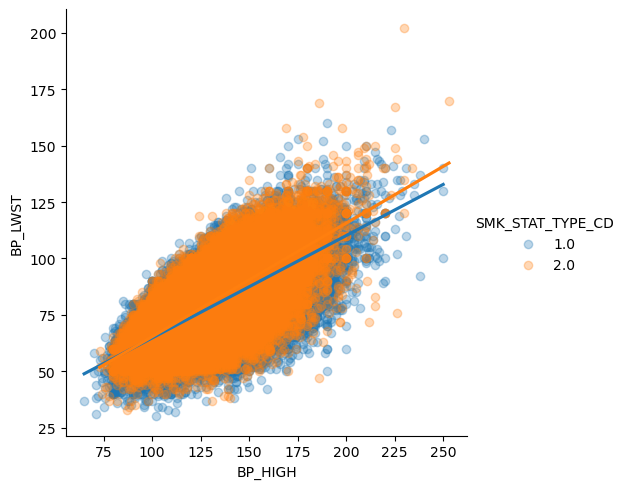

In [115]:
sns.lmplot(data = t_df,x="BP_HIGH",y="BP_LWST",hue="SMK_STAT_TYPE_CD",scatter_kws={"alpha": 0.3})

<Axes: xlabel='SMK_STAT_TYPE_CD', ylabel='BP_HIGH'>

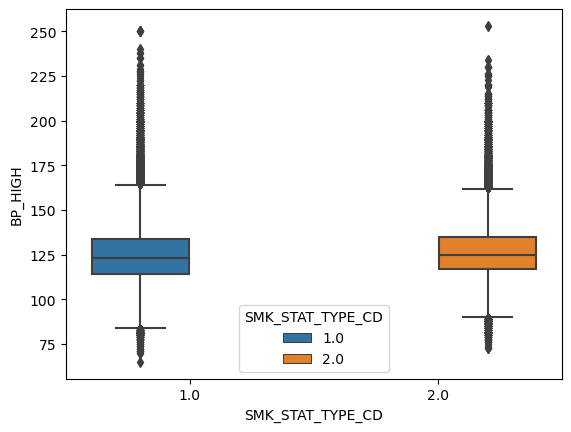

In [155]:
sns.boxplot(t_df,x="SMK_STAT_TYPE_CD",y="BP_HIGH",hue="SMK_STAT_TYPE_CD")

<Axes: xlabel='SMK_STAT_TYPE_CD', ylabel='BP_LWST'>

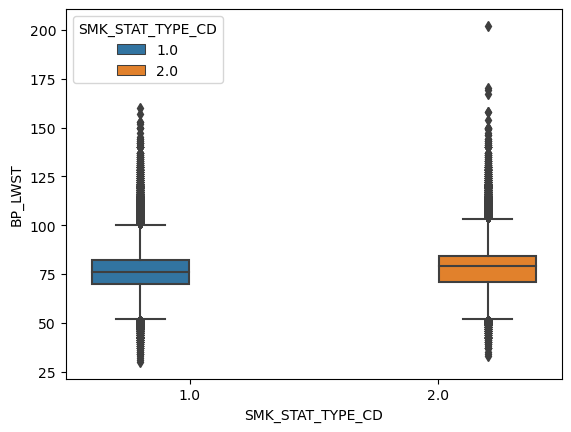

In [156]:
sns.boxplot(t_df,x="SMK_STAT_TYPE_CD",y="BP_LWST",hue="SMK_STAT_TYPE_CD")

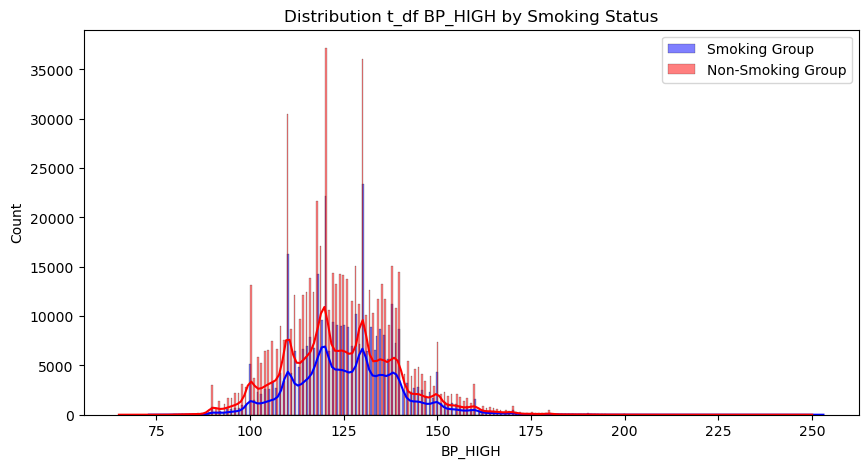

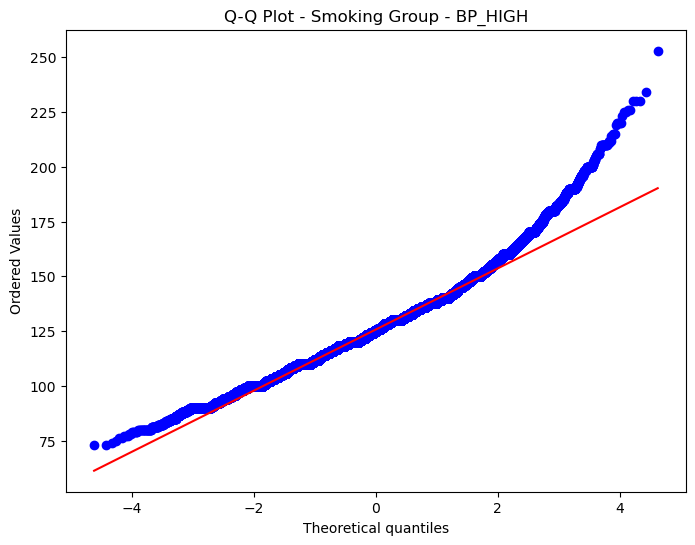

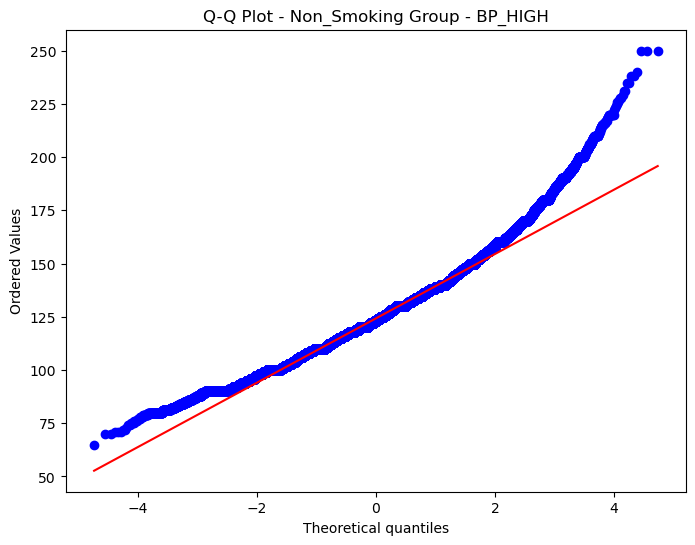

In [179]:
# BLDS 열을 기준으로 담배를 피우는 그룹과 피우지 않는 그룹의 데이터 추출
smoking_group_h = t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_HIGH'].dropna()
non_smoking_group_h = t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_HIGH'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(10, 5))
sns.histplot(smoking_group_h, kde=True, color='blue', label='Smoking Group')
sns.histplot(non_smoking_group_h, kde=True, color='red', label='Non-Smoking Group')
plt.title('Distribution t_df BP_HIGH by Smoking Status')
plt.xlabel('BP_HIGH')
plt.legend()
plt.show()

# Q-Q plot 그리기
plt.figure(figsize=(8, 6))
stats.probplot(smoking_group_h, dist="norm", plot=plt)
plt.title('Q-Q Plot - Smoking Group - BP_HIGH')
plt.show()
plt.figure(figsize=(8, 6))
stats.probplot(non_smoking_group_h, dist="norm", plot=plt)
plt.title('Q-Q Plot - Non_Smoking Group - BP_HIGH')
plt.show()

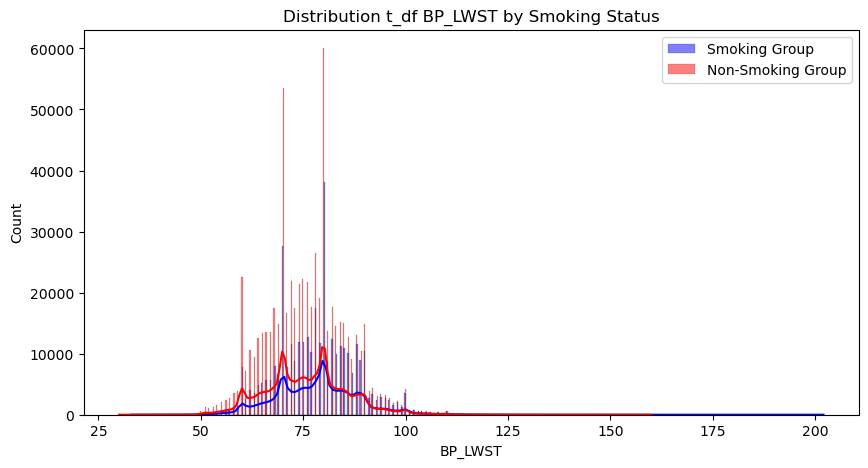

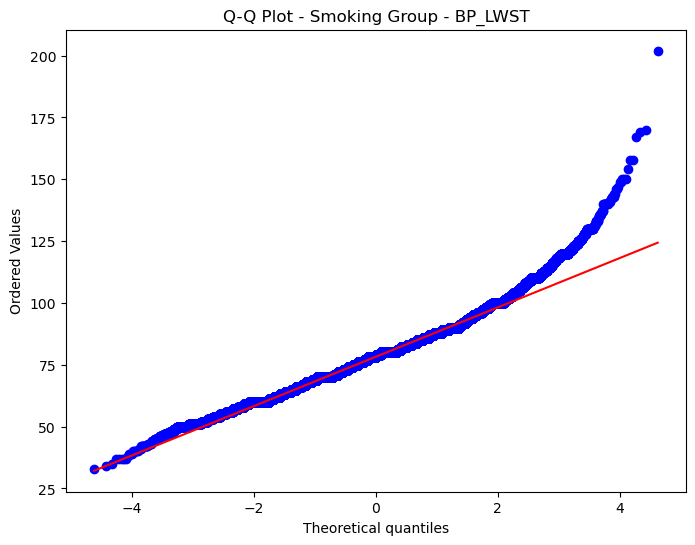

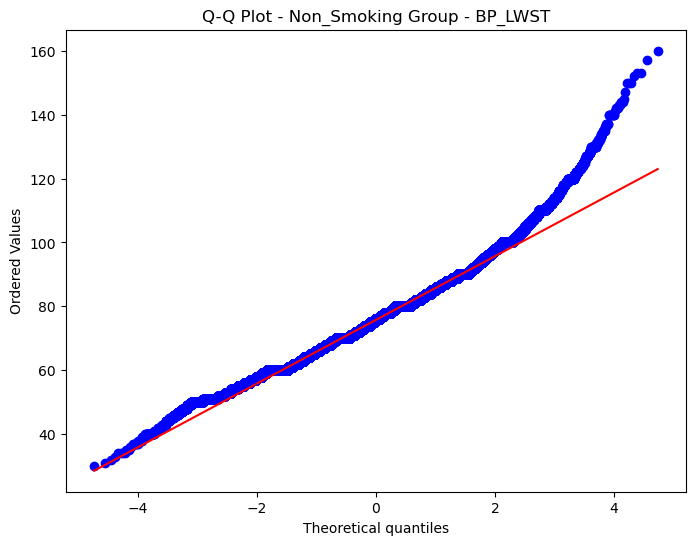

In [180]:
# BLDS 열을 기준으로 담배를 피우는 그룹과 피우지 않는 그룹의 데이터 추출
smoking_group_l = t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_LWST'].dropna()
non_smoking_group_l = t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_LWST'].dropna()
# 히스토그램 그리기
plt.figure(figsize=(10, 5))
sns.histplot(smoking_group_l, kde=True, color='blue', label='Smoking Group')
sns.histplot(non_smoking_group_l, kde=True, color='red', label='Non-Smoking Group')
plt.title('Distribution t_df BP_LWST by Smoking Status')
plt.xlabel('BP_LWST')
plt.legend()
plt.show()

# Q-Q plot 그리기
plt.figure(figsize=(8, 6))
stats.probplot(smoking_group_l, dist="norm", plot=plt)
plt.title('Q-Q Plot - Smoking Group - BP_LWST')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(non_smoking_group_l, dist="norm", plot=plt)
plt.title('Q-Q Plot - Non_Smoking Group - BP_LWST')
plt.show()

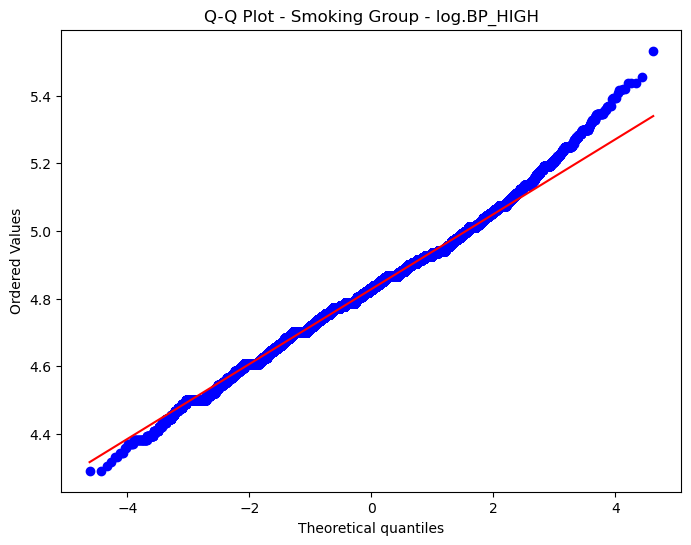

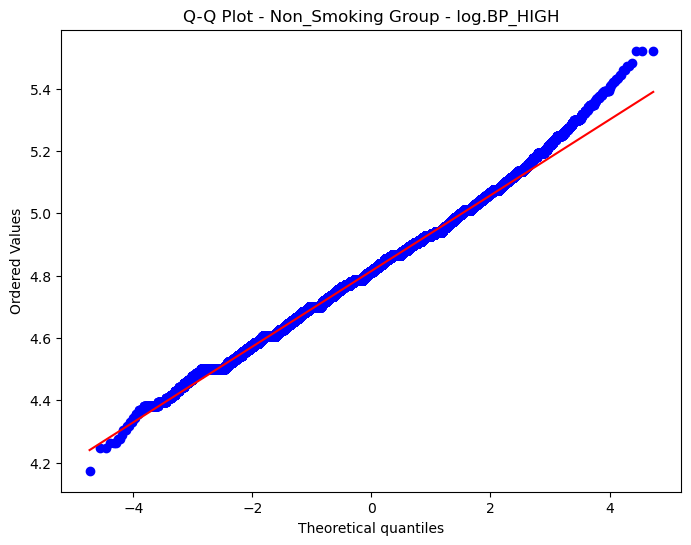

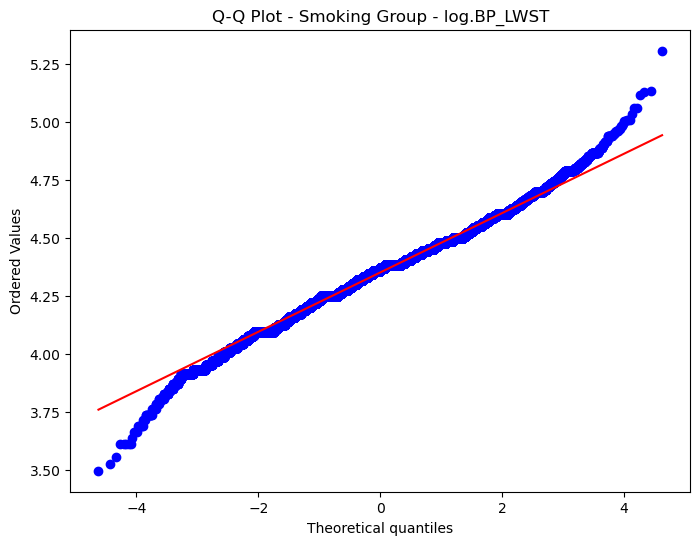

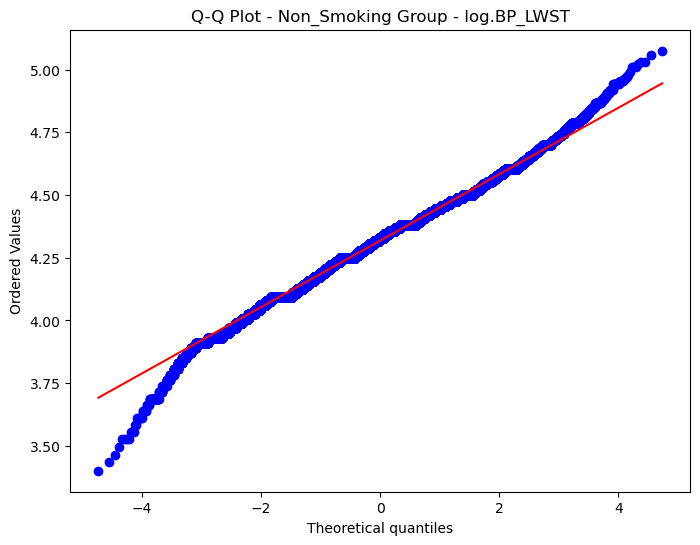

In [181]:
l_sm_h = np.log(smoking_group_h)
l_nsm_h = np.log(non_smoking_group_h)
l_sm_l = np.log(smoking_group_l)
l_nsm_l = np.log(non_smoking_group_l)
# Q-Q plot 그리기
plt.figure(figsize=(8, 6))
stats.probplot(l_sm_h, dist="norm", plot=plt)
plt.title('Q-Q Plot - Smoking Group - log.BP_HIGH')
plt.show()
plt.figure(figsize=(8, 6))
stats.probplot(l_nsm_h , dist="norm", plot=plt)
plt.title('Q-Q Plot - Non_Smoking Group - log.BP_HIGH')
plt.show()

# Q-Q plot 그리기
plt.figure(figsize=(8, 6))
stats.probplot(l_sm_l, dist="norm", plot=plt)
plt.title('Q-Q Plot - Smoking Group - log.BP_LWST')
plt.show()

plt.figure(figsize=(8, 6))
stats.probplot(l_nsm_l , dist="norm", plot=plt)
plt.title('Q-Q Plot - Non_Smoking Group - log.BP_LWST')
plt.show()

In [182]:
def remove_outliers(df, column, quantile_low=0.05, quantile_high=0.95):
    low_limit = df[column].quantile(quantile_low)
    high_limit = df[column].quantile(quantile_high)
    df_filtered = df[(df[column] >= low_limit) & (df[column] <= high_limit)]
    return df_filtered
t_df = remove_outliers(t_df, 'BP_HIGH')
t_df = remove_outliers(t_df, 'BP_LWST')

<Axes: xlabel='SMK_STAT_TYPE_CD', ylabel='BP_HIGH'>

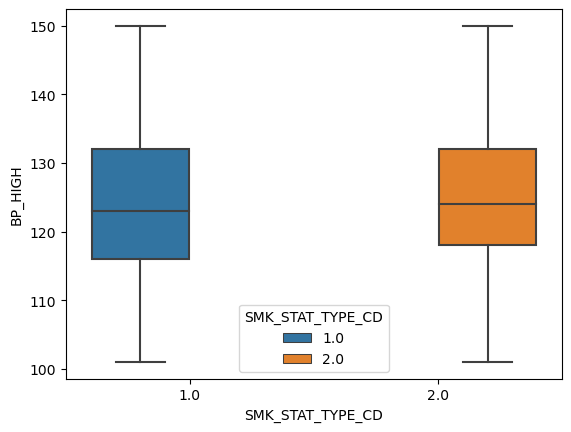

In [122]:
sns.boxplot(t_df,x="SMK_STAT_TYPE_CD",y="BP_HIGH",hue="SMK_STAT_TYPE_CD")

<Axes: xlabel='SMK_STAT_TYPE_CD', ylabel='BP_LWST'>

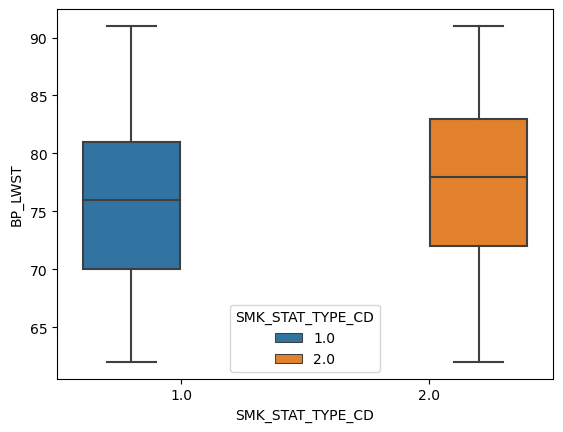

In [123]:
sns.boxplot(t_df,x="SMK_STAT_TYPE_CD",y="BP_LWST",hue="SMK_STAT_TYPE_CD")

In [183]:
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_HIGH'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_HIGH'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_LWST'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_LWST'].count())


305481
512965
305481
512965


In [185]:
from scipy.stats import ttest_ind, shapiro, levene

# 담배를 피우는 그룹과 피우지 않는 그룹의 수축기 혈압 비교 (샘플 크기를 1000개로 제한)
smoking_group = t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_HIGH'].sample(n=5000, random_state=42)
non_smoking_group = t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_HIGH'].sample(n=5000, random_state=42)

# 정규성 검정
shapiro_statistic_smoking, shapiro_p_value_smoking = shapiro(smoking_group)
shapiro_statistic_non_smoking, shapiro_p_value_non_smoking = shapiro(non_smoking_group)

print(f"Shapiro-Wilk Test - Smoking Group - Statistic: {shapiro_statistic_smoking}, p-value: {shapiro_p_value_smoking}")
print(f"Shapiro-Wilk Test - Non-Smoking Group - Statistic: {shapiro_statistic_non_smoking}, p-value: {shapiro_p_value_non_smoking}")
      
# 정규성 검정
log_shapiro_statistic_smoking, log_shapiro_p_value_smoking = shapiro(np.log(smoking_group))
log_shapiro_statistic_non_smoking, log_shapiro_p_value_non_smoking = shapiro(np.log(non_smoking_group))

print(f"Shapiro-Wilk Test - Smoking Group - Statistic: {log_shapiro_statistic_smoking}, p-value: {log_shapiro_p_value_smoking}")
print(f"Shapiro-Wilk Test - Non-Smoking Group - Statistic: {log_shapiro_statistic_non_smoking}, p-value: {log_shapiro_p_value_non_smoking}")

# 등분산성 검정
levene_statistic, levene_p_value = levene(smoking_group, non_smoking_group)
print(f"Levene's Test - Statistic: {levene_statistic}, p-value: {levene_p_value}")
# 등분산성 검정(log)
log_levene_statistic, log_levene_p_value = levene(np.log(smoking_group),np.log(non_smoking_group))
print(f"Levene's Test - Statistic: {log_levene_statistic}, p-value: {log_levene_p_value}")

Shapiro-Wilk Test - Smoking Group - Statistic: 0.9888163805007935, p-value: 1.7677666531113098e-19
Shapiro-Wilk Test - Non-Smoking Group - Statistic: 0.9861621856689453, p-value: 9.591839768632508e-22
Shapiro-Wilk Test - Smoking Group - Statistic: 0.9890651702880859, p-value: 3.0126478841034155e-19
Shapiro-Wilk Test - Non-Smoking Group - Statistic: 0.9867544174194336, p-value: 2.8721225480779145e-21
Levene's Test - Statistic: 19.436200035856036, p-value: 1.0510276495339929e-05
Levene's Test - Statistic: 22.441224874964856, p-value: 2.1965683505951953e-06


In [187]:
from scipy.stats import ranksums

# 랭크-섬(Rank Sum) 검정 수행
statistic, p_value = ranksums(smoking_group, non_smoking_group)

# 결과 출력
print(f"Rank Sum Statistic: {statistic}")
print(f"P-value: {p_value}")


Rank Sum Statistic: 2.433818460743942
P-value: 0.01494048624726209


In [188]:
smoking_group = t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_LWST'].dropna().sample(n=5000,random_state=42)
non_smoking_group = t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_LWST'].dropna().sample(n=5000, random_state=42)

# 등분산성 검정
levene_statistic, levene_p_value = levene(smoking_group, non_smoking_group)
print(f"Levene's Test - Statistic: {levene_statistic}, p-value: {levene_p_value}")

# 정규성 검정
shapiro_statistic_smoking, shapiro_p_value_smoking = shapiro(smoking_group)
shapiro_statistic_non_smoking, shapiro_p_value_non_smoking = shapiro(non_smoking_group)

print(f"Shapiro-Wilk Test - Smoking Group - Statistic: {shapiro_statistic_smoking}, p-value: {shapiro_p_value_smoking}")
print(f"Shapiro-Wilk Test - Non-Smoking Group - Statistic: {shapiro_statistic_non_smoking}, p-value: {shapiro_p_value_non_smoking}")

# 정규성 검정
log_shapiro_statistic_smoking, log_shapiro_p_value_smoking = shapiro(np.log(smoking_group))
log_shapiro_statistic_non_smoking, log_shapiro_p_value_non_smoking = shapiro(np.log(non_smoking_group))

print(f"Shapiro-Wilk Test - Smoking Group - Statistic: {log_shapiro_statistic_smoking}, p-value: {log_shapiro_p_value_smoking}")
print(f"Shapiro-Wilk Test - Non-Smoking Group - Statistic: {log_shapiro_statistic_non_smoking}, p-value: {log_shapiro_p_value_non_smoking}")

Levene's Test - Statistic: 0.11153426408436405, p-value: 0.7384111180903108
Shapiro-Wilk Test - Smoking Group - Statistic: 0.9763091802597046, p-value: 4.616199372461059e-28
Shapiro-Wilk Test - Non-Smoking Group - Statistic: 0.9793397188186646, p-value: 2.258450377451843e-26
Shapiro-Wilk Test - Smoking Group - Statistic: 0.9726845622062683, p-value: 7.047639704931279e-30
Shapiro-Wilk Test - Non-Smoking Group - Statistic: 0.9793578386306763, p-value: 2.3145234425966885e-26


In [189]:
from scipy.stats import ranksums

# 랭크-섬(Rank Sum) 검정 수행
statistic, p_value = ranksums(smoking_group, non_smoking_group)

# 결과 출력
print(f"Rank Sum Statistic: {statistic}")
print(f"P-value: {p_value}")


Rank Sum Statistic: 11.181969693147362
P-value: 4.996845776500536e-29


                   BP_HIGH   BP_LWST  SMK_STAT_TYPE_CD
BP_HIGH           1.000000  0.694116          0.047589
BP_LWST           0.694116  1.000000          0.119923
SMK_STAT_TYPE_CD  0.047589  0.119923          1.000000


<Axes: >

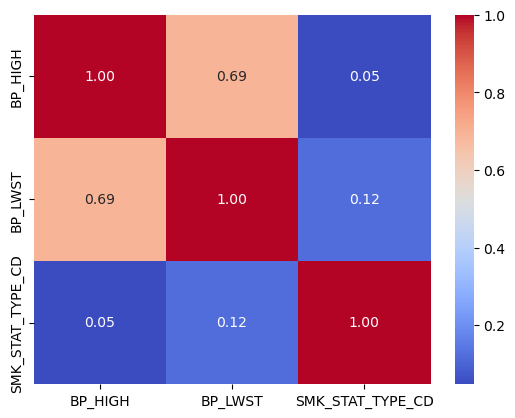

In [167]:
import pandas as pd

# 흡연 여부에 대한 상관관계 계산
correlation = t_df[['BP_HIGH', 'BP_LWST', 'SMK_STAT_TYPE_CD']].corr()

# 결과 출력
print(correlation)
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')


In [190]:
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_HIGH'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_HIGH'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 2]['BP_LWST'].count())
print(t_df[t_df['SMK_STAT_TYPE_CD'] == 1]['BP_LWST'].count())


305481
512965
305481
512965


In [191]:
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
label_encoder = LabelEncoder()

# 'SMK_STAT_TYPE_CD' 열에 라벨 인코딩 적용
t_df['SMK_STAT_TYPE_CD'] = label_encoder.fit_transform(t_df['SMK_STAT_TYPE_CD'])

# 모델 생성
X = sm.add_constant(t_df[['BP_HIGH', 'BP_LWST']])
y = t_df['SMK_STAT_TYPE_CD']
model = sm.Logit(y, X).fit()

# 로지스틱 회귀분석 결과 출력
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.654745
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       SMK_STAT_TYPE_CD   No. Observations:               818446
Model:                          Logit   Df Residuals:                   818443
Method:                           MLE   Df Model:                            2
Date:                Wed, 13 Dec 2023   Pseudo R-squ.:                0.008953
Time:                        05:52:12   Log-Likelihood:            -5.3587e+05
converged:                       True   LL-Null:                   -5.4071e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2373      0.029    -77.235      0.000      -2.294      -2.180
BP_HIGH       -0.0092      0.